**Task1- Perform Data Cleaning**

In [2]:
import pandas as pd
file_path = '/content/test (1).csv'#with testing data
data = pd.read_csv(file_path)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
data.drop(columns=['Cabin'], inplace=True)

In [4]:
# Step 2: Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [5]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [6]:
for col in ['Age', 'Fare']:
    data = remove_outliers(data, col)

In [7]:
print("Cleaned Data Overview:")
print(data.info())
data.to_csv('/content/test (1).csv', index=False)

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  333 non-null    int64  
 1   Pclass       333 non-null    int64  
 2   Name         333 non-null    object 
 3   Sex          333 non-null    object 
 4   Age          333 non-null    float64
 5   SibSp        333 non-null    int64  
 6   Parch        333 non-null    int64  
 7   Ticket       333 non-null    object 
 8   Fare         333 non-null    float64
 9   Embarked     333 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.6+ KB
None



**Remove Missing Values:**

Drop columns with excessive missing values (Cabin) since they are unlikely to provide useful information.

Fill missing values in Age and Fare with appropriate substitutes (e.g., median or mean).

**Handle Outliers:**

Use the Interquartile Range (IQR) method to detect and remove outliers for numeric columns (Age, Fare).

In [ ]:
import pandas as pd
file_path = '/content/test (1).csv'
data = pd.read_csv(file_path)
summary_stats = {}
for col in data.select_dtypes(include=['number']).columns:
    summary_stats[col] = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Mode': data[col].mode()[0],  # Get the first mode
        'Standard Deviation': data[col].std()
    }
summary_stats_df = pd.DataFrame(summary_stats).transpose()
print("Mean, Median, Mode, and Standard Deviation:")
print(summary_stats_df)


Mean, Median, Mode, and Standard Deviation:
                    Mean     Median    Mode  Standard Deviation
PassengerId  1100.500000  1100.5000  892.00          120.810458
Pclass          2.265550     3.0000    3.00            0.841838
Age            30.272590    27.0000   21.00           14.181209
SibSp           0.447368     0.0000    0.00            0.896760
Parch           0.392344     0.0000    0.00            0.981429
Fare           35.627188    14.4542    7.75           55.907576


**Task3: Data Vistualization using Histogram**

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
file_path = '/content/Iris (1).csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


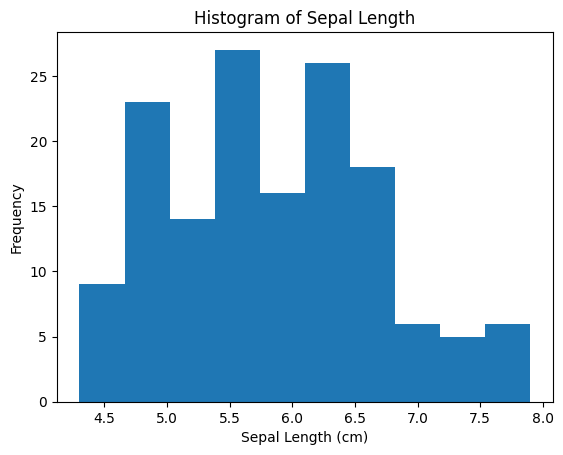

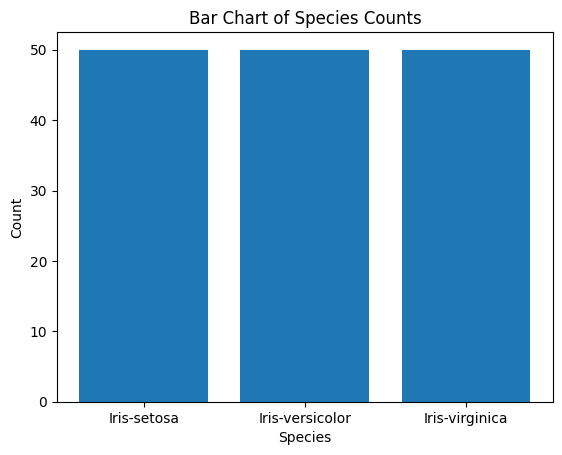

In [ ]:
plt.hist(data['SepalLengthCm'], bins=10)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

species_counts = data['Species'].value_counts()
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Bar Chart of Species Counts')
plt.show()

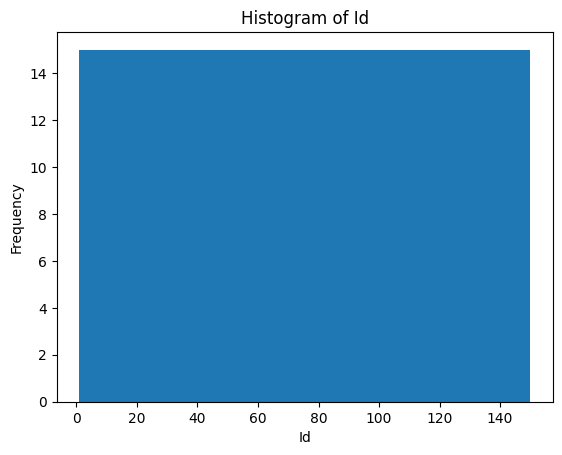

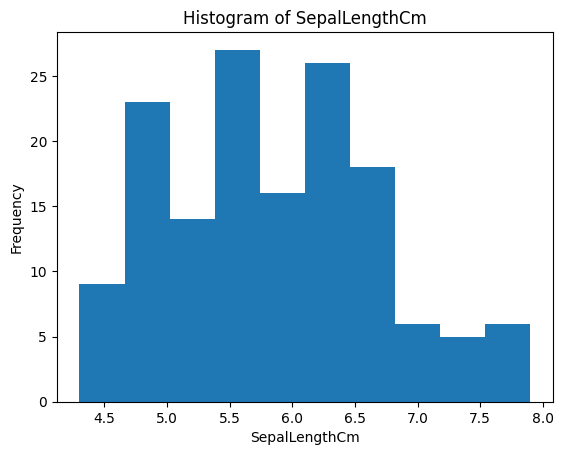

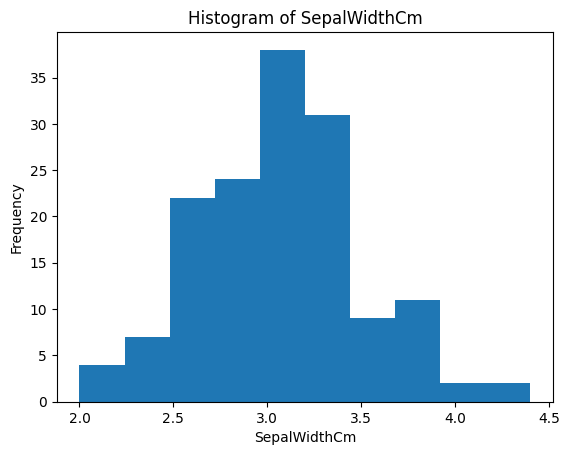

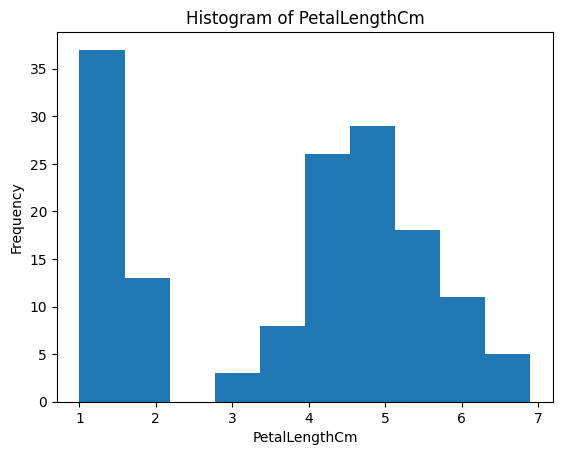

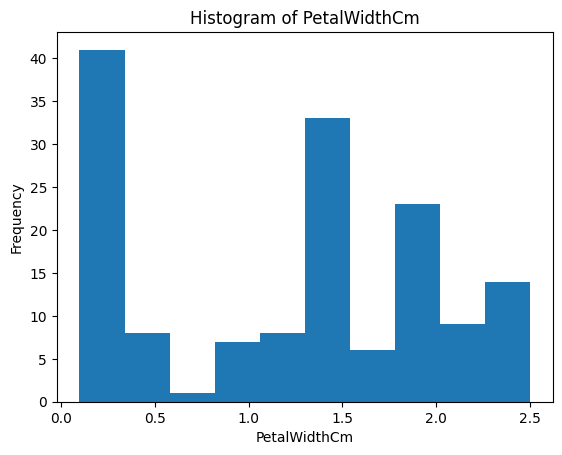

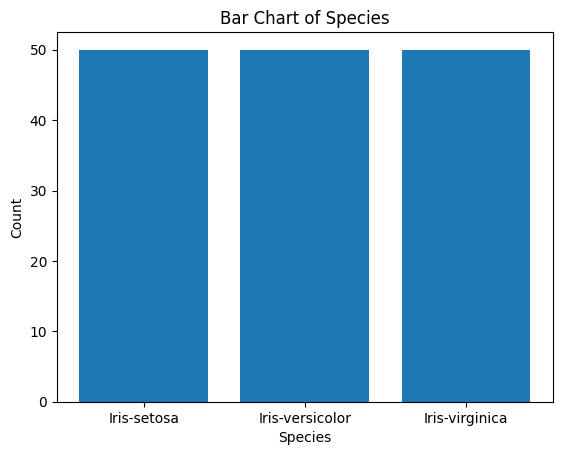

In [ ]:
import matplotlib.pyplot as plt
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure()
        plt.hist(data[column])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

species_counts = data['Species'].value_counts()
plt.figure()
plt.bar(species_counts.index, species_counts.values)
plt.title('Bar Chart of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()